
## 📊 Popolazione residente per classi d'età, anno e Comune nella regione Piemonte

**Categorie tematiche:**  
- *Giustizia, sistema giuridico e sicurezza pubblica*  
- *Popolazione e società*

**Descrizione:**  
Popolazione residente per anno e Comune, suddivisa per cittadinanza e classi di età per sesso (0–14, 15–65, > 65), con indicatore dell'età mediana e indice **IDA** (*Indice di Dipendenza degli Anziani*).  
Dati annuali con suddivisione secondo la classificazione **NUTS**. Per il rispetto del segreto statistico, le rilevazioni per Comune nelle varie fasce d’età sono riportate solo se superiori a 3 persone.

**Ente titolare:** Regione Piemonte  
**Fonte:** [Yucca SDP – dati.piemonte.it](https://www.dati.piemonte.it)
**Ultimo aggiornamento scheda metadato:** 6/5/2025


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\app\DataAnalystBootcamp\Progetto Linkedin\popolazionePiemonte.csv',sep=';')

df.head()

,anno,istat_comune,comune,cod_nuts,nuts1,nuts2,nuts3,cittadinanza,pop_0_14_maschi,pop_0_14_femmine,pop_15_64_maschi,pop_15_64_femmine,pop_over_65_maschi,pop_over_65_femmine,totale,ida,eta_mediana
0,2023,1008,ALPIGNANO,ITC11,NORD-OVEST,PIEMONTE,TORINO,ITALIANA,929,841,5154,4883,2150,2627,16584,"47,59","50,0"
1,2023,1020,BANCHETTE,ITC11,NORD-OVEST,PIEMONTE,TORINO,STRANIERA,33,25,135,155,5,=< 3,356,"2,76","45,5"
2,2023,1101,FAVRIA,ITC11,NORD-OVEST,PIEMONTE,TORINO,STRANIERA,46,38,139,156,=< 3,=< 3,379,"0,0","47,5"
3,2019,1107,FORNO CANAVESE,ITC11,NORD-OVEST,PIEMONTE,TORINO,STRANIERA,32,23,112,118,=< 3,=< 3,285,"0,0","49,5"
4,2023,1158,MONTALDO TORINESE,ITC11,NORD-OVEST,PIEMONTE,TORINO,ITALIANA,37,26,215,218,88,92,676,"41,57","52,0"


### Analisi esplorativa

In [3]:
# Mostro le colonne del DataFrame
df.columns

Index(['anno', 'istat_comune', 'comune', 'cod_nuts', 'nuts1', 'nuts2', 'nuts3',
       'cittadinanza', 'pop_0_14_maschi', 'pop_0_14_femmine',
       'pop_15_64_maschi', 'pop_15_64_femmine', 'pop_over_65_maschi',
       'pop_over_65_femmine', 'totale', 'ida', 'eta_mediana'],
      dtype='object')

### In questo dataset sono presenti i seguenti campi:
- **anno**: Anno di riferimento della rilevazione   
- **comune**: Nome del Comune
- **codice_comune**: Codice Istat del Comune
- **codice_nuts**: Codice NUTS del Comune  
- **cittadinanza**: Cittadinanza della popolazione residente
- **sesso**: Sesso della popolazione residente
- **fascia_eta**: Classe di età della popolazione residente
- **popolazione**: Numero di residenti nella classe di età
- **eta_mediana**: Età mediana della popolazione residente
- **indice_ida**: Indice di Dipendenza degli Anziani (IDA) della popolazione residente

In [4]:
# Controllo i valori unici nella colonne 'anno', 'cittadinanza', e 'comune'

print(f"Anni disponibili:{df['anno'].unique()}")
print("Cittadinanze:", df['cittadinanza'].unique())
print("Numero comuni:", df['comune'].nunique())


Anni disponibili:[2023 2019 2022 2021 2020]
Cittadinanze: ['ITALIANA' 'STRANIERA']
Numero comuni: 969


In [5]:
## controllo la forma del DataFrame
print(f"Forma del DataFrame: {df.shape}")
print(f"Numero di righe: {df.shape[0]}")
print(f"Numero di colonne: {df.shape[1]}")

Forma del DataFrame: (16929, 17)
Numero di righe: 16929
Numero di colonne: 17


In [6]:
# Controllo dati mancanti
print("Dati mancanti per ogni colonna:")    
df.isnull().sum()

Dati mancanti per ogni colonna:


anno                   0
istat_comune           0
comune                 0
cod_nuts               0
nuts1                  0
nuts2                  0
nuts3                  0
cittadinanza           0
pop_0_14_maschi        0
pop_0_14_femmine       0
pop_15_64_maschi       0
pop_15_64_femmine      0
pop_over_65_maschi     0
pop_over_65_femmine    0
totale                 0
ida                    0
eta_mediana            0
dtype: int64

In [7]:
df['nuts3'].unique()

array(['TORINO', 'VERCELLI', 'NOVARA', 'CUNEO', 'ASTI', 'ALESSANDRIA',
       'BIELLA', 'VERBANO-CUSIO-OSSOLA'], dtype=object)

In [8]:
df.columns

Index(['anno', 'istat_comune', 'comune', 'cod_nuts', 'nuts1', 'nuts2', 'nuts3',
       'cittadinanza', 'pop_0_14_maschi', 'pop_0_14_femmine',
       'pop_15_64_maschi', 'pop_15_64_femmine', 'pop_over_65_maschi',
       'pop_over_65_femmine', 'totale', 'ida', 'eta_mediana'],
      dtype='object')

In [9]:
df['cod_nuts'].unique()

array(['ITC11', 'ITC12', 'ITC15', 'ITC16', 'ITC17', 'ITC18', 'ITC13',
       'ITC14'], dtype=object)

In [10]:
df['nuts1'].unique()



array(['NORD-OVEST'], dtype=object)

In [11]:
df.drop(columns=['nuts1'], inplace=True)

In [12]:
### rinomino alcuni campi per renderli più comprensibili

df.rename(columns={'istat_comune':'codice_istat',
                   'nuts2':'regione',
                   'nuts3':'provincia',
                   'pop_0_14_maschi': 'maschi_0_14',
                   'pop_0_14_femmine': 'femmine_0_14',
                   'pop_15_64_maschi': 'maschi_15_64',
                   'pop_15_64_femmine': 'femmine_15_64',
                   'pop_over_65_maschi': 'maschi_over_65',
                   'pop_over_65_femmine': 'femmine_over_65',
                   'totale':'popolazione_totale',
                   'ida':'indice_anziani'},inplace=True)

In [13]:
# Rimuovo le colonne che non mi servono, Regione è sempre Piemonte
df.drop(columns=['regione'], inplace=True)

In [14]:
## verifico le modifiche sui nomi delle colonne
df.head()

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
0,2023,1008,ALPIGNANO,ITC11,TORINO,ITALIANA,929,841,5154,4883,2150,2627,16584,"47,59","50,0"
1,2023,1020,BANCHETTE,ITC11,TORINO,STRANIERA,33,25,135,155,5,=< 3,356,"2,76","45,5"
2,2023,1101,FAVRIA,ITC11,TORINO,STRANIERA,46,38,139,156,=< 3,=< 3,379,"0,0","47,5"
3,2019,1107,FORNO CANAVESE,ITC11,TORINO,STRANIERA,32,23,112,118,=< 3,=< 3,285,"0,0","49,5"
4,2023,1158,MONTALDO TORINESE,ITC11,TORINO,ITALIANA,37,26,215,218,88,92,676,"41,57","52,0"


In [15]:
df.columns

Index(['anno', 'codice_istat', 'comune', 'cod_nuts', 'provincia',
       'cittadinanza', 'maschi_0_14', 'femmine_0_14', 'maschi_15_64',
       'femmine_15_64', 'maschi_over_65', 'femmine_over_65',
       'popolazione_totale', 'indice_anziani', 'eta_mediana'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   anno                16929 non-null  int64 
 1   codice_istat        16929 non-null  int64 
 2   comune              16929 non-null  object
 3   cod_nuts            16929 non-null  object
 4   provincia           16929 non-null  object
 5   cittadinanza        16929 non-null  object
 6   maschi_0_14         16929 non-null  object
 7   femmine_0_14        16929 non-null  object
 8   maschi_15_64        16929 non-null  int64 
 9   femmine_15_64       16929 non-null  int64 
 10  maschi_over_65      16929 non-null  object
 11  femmine_over_65     16929 non-null  object
 12  popolazione_totale  16929 non-null  int64 
 13  indice_anziani      16929 non-null  object
 14  eta_mediana         16929 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.9+ MB


In [17]:
## osservo che le ultime colonne sono di tipo object, ma contengono valori numerici.
## Per questo motivo, le convertirò in tipo float64.

In [18]:
df['indice_anziani'] = df['indice_anziani'].str.replace(',', '.').astype(float)
df['eta_mediana'] = df['eta_mediana'].str.replace(',', '.').astype(float)


In [19]:
df[['indice_anziani', 'eta_mediana']].head()

,indice_anziani,eta_mediana
0,47.59,50.0
1,2.76,45.5
2,0.00,47.5
3,0.00,49.5
4,41.57,52.0


In [20]:
## controllo che le colonne indice_anziani e eta_mediana siano state convertite correttamente
df[['indice_anziani','eta_mediana']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice_anziani  16929 non-null  float64
 1   eta_mediana     16929 non-null  float64
dtypes: float64(2)
memory usage: 264.6 KB


In [21]:
## noto che alcuni valori sono =<3 e li sostituisco con 3
df[['maschi_0_14', 'femmine_0_14', 'maschi_15_64', 'femmine_15_64', 'maschi_over_65', 'femmine_over_65']].head()

,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65
0,929,841,5154,4883,2150,2627
1,33,25,135,155,5,=< 3
2,46,38,139,156,=< 3,=< 3
3,32,23,112,118,=< 3,=< 3
4,37,26,215,218,88,92


In [22]:
cols_da_convertire = ['maschi_0_14', 'femmine_0_14', 'maschi_over_65', 'femmine_over_65']

for col in cols_da_convertire:
    df[col] = df[col].replace('=< 3', '3')  # sostituisce stringa
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # converte in numerico Int64 che supporta NaN


In [23]:
## Verifico che le colonne siano state convertite correttamente
df[['maschi_0_14', 'femmine_0_14', 'maschi_over_65', 'femmine_over_65']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16929 entries, 0 to 16928
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   maschi_0_14      16929 non-null  Int64
 1   femmine_0_14     16929 non-null  Int64
 2   maschi_over_65   16929 non-null  Int64
 3   femmine_over_65  16929 non-null  Int64
dtypes: Int64(4)
memory usage: 595.3 KB


In [24]:
## Verifo che i valori in cui c'era <= 3 siano stati sostituiti correttamente
df[['maschi_0_14', 'femmine_0_14', 'maschi_15_64', 'femmine_15_64', 'maschi_over_65', 'femmine_over_65']].head(10)

,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65
0,929,841,5154,4883,2150,2627
1,33,25,135,155,5,3
2,46,38,139,156,3,3
3,32,23,112,118,3,3
4,37,26,215,218,88,92
5,50,38,170,266,3,3
6,2031,2072,10801,10954,4037,5522
7,141,124,582,588,208,236
8,93,87,441,422,198,215
9,125,118,411,603,11,19


### Inizio Analisi dettagliata per comune, dopo aver pulito i dati

### Esempi di utilizzo
- Analizzare la distribuzione della popolazione residente per classi d'età e cittadinanza nei vari Comuni della regione Piemonte.
- Studiare l'andamento demografico nel tempo, osservando le variazioni della popolazione per fasce d'età e sesso.
- Valutare l'indice di dipendenza degli anziani per comprendere le dinamiche demografiche e le necessità sociali nei diversi Comuni.  

# Comune di Torino

### ℹ️ Nota sulla popolazione di Torino (2023)

Secondo il dataset ufficiale della Regione Piemonte, la popolazione totale del Comune di **Torino** nel **2023** risulta pari a:

**981.147 abitanti**  
(valore ottenuto sommando italiani e stranieri in tutte le fasce d’età)

📉 Tuttavia, confrontando con i dati ISTAT aggiornati al 31/12/2023, il numero ufficiale si attesta intorno a **840.000 abitanti**.

📌 Il disallineamento può dipendere da:
- Differenti criteri di definizione della “popolazione residente”,
- Aggregazioni multiple per livelli NUTS nel dataset,
- Inclusione di residenti temporanei.

Il dato è stato comunque mantenuto per fini **esplorativi** e per l’**analisi comparativa interna** al dataset stesso.

Fonte dati: Regione Piemonte – [dati.piemonte.it](https://www.dati.piemonte.it)  
Ultimo aggiornamento: 6 maggio 2025

In [25]:
### Mostro la colonna riguardante  il comune di Torino
df_torino = df[df['comune'] == 'TORINO']
df_torino


,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
184,2021,1272,TORINO,ITC11,TORINO,ITALIANA,51102,48251,263725,264787,92235,128648,848748,41.79,50.0
214,2020,1272,TORINO,ITC11,TORINO,STRANIERA,12567,11624,48225,50615,1780,3421,128232,5.26,50.0
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
637,2022,1272,TORINO,ITC11,TORINO,STRANIERA,12029,11269,49116,49329,2145,3943,127831,6.18,50.0
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5
762,2022,1272,TORINO,ITC11,TORINO,ITALIANA,49909,47241,264597,265338,92212,128101,847398,41.57,50.0
896,2019,1272,TORINO,ITC11,TORINO,STRANIERA,12290,11422,45535,49420,1696,3289,123652,5.25,49.5
3493,2019,1272,TORINO,ITC11,TORINO,ITALIANA,52390,49390,264011,268761,93041,130317,857910,41.92,50.0
3905,2020,1272,TORINO,ITC11,TORINO,ITALIANA,52224,49194,265448,269238,92433,129668,858205,41.54,50.0
4276,2021,1272,TORINO,ITC11,TORINO,STRANIERA,12278,11438,47643,47905,1908,3404,124576,5.56,50.0


In [26]:
df_torino_2023 = df_torino[df_torino['anno'] == 2023]
df_torino_2023

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5
7189,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
7514,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5
12973,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
13298,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5


In [27]:
df[df['comune'] == 'TORINO'][['anno', 'cittadinanza']].value_counts()

anno  cittadinanza
2019  ITALIANA        3
      STRANIERA       3
2020  ITALIANA        3
      STRANIERA       3
2021  ITALIANA        3
      STRANIERA       3
2022  ITALIANA        3
      STRANIERA       3
2023  ITALIANA        3
      STRANIERA       3
Name: count, dtype: int64

Ho 6 righe per TORINO nel 2023, ma solo due combinazioni uniche:

Cittadinanza ITALIANA

Cittadinanza STRANIERA

Queste coppie sono ripetute 3 volte ciascuna, con valori identici in ogni riga.

In [28]:
# Rimuovo i duplicati dal DataFrame df_torino_2023
df_torino_2023_clean = df_torino_2023.drop_duplicates()


In [29]:
df_torino_2023_clean

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5


In [30]:
df_torino_2023_clean['popolazione_totale'].sum()
print(f"Popolazione totale di Torino nel 2023: {df_torino_2023_clean['popolazione_totale'].sum()}")

Popolazione totale di Torino nel 2023: 981147


 Analizzo la distribuzione della popolazione residente per classi d'età e cittadinanza nel comune di Torino nel 2023:

Calcolo popolazione per fascia d'età (somma maschi + femmine) per il comune di Torino nel 2023:

In [31]:
df.columns

Index(['anno', 'codice_istat', 'comune', 'cod_nuts', 'provincia',
       'cittadinanza', 'maschi_0_14', 'femmine_0_14', 'maschi_15_64',
       'femmine_15_64', 'maschi_over_65', 'femmine_over_65',
       'popolazione_totale', 'indice_anziani', 'eta_mediana'],
      dtype='object')

In [32]:
df_torino_2023_clean = df_torino_2023_clean.copy()

df_torino_2023_clean['pop_0_14'] = df_torino_2023_clean['maschi_0_14'] + df_torino_2023_clean['femmine_0_14']
df_torino_2023_clean['pop_15_64'] = df_torino_2023_clean['maschi_15_64'] + df_torino_2023_clean['femmine_15_64']
df_torino_2023_clean['pop_65_plus'] = df_torino_2023_clean['maschi_over_65'] + df_torino_2023_clean['femmine_over_65']

# Ora calcolo la percentuale rispetto alla popolazione totale
df_torino_2023_clean['perc_pop_0_14'] = df_torino_2023_clean['pop_0_14'] / df_torino_2023_clean['popolazione_totale'] * 100
df_torino_2023_clean['perc_pop_15_64'] = df_torino_2023_clean['pop_15_64'] / df_torino_2023_clean['popolazione_totale'] * 100
df_torino_2023_clean['perc_pop_65_plus'] = df_torino_2023_clean['pop_65_plus'] / df_torino_2023_clean['popolazione_totale'] * 100


In [33]:
df_torino_2023_clean.head()

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,...,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana,pop_0_14,pop_15_64,pop_65_plus,perc_pop_0_14,perc_pop_15_64,perc_pop_65_plus
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,...,128150,851199,41.21,50.0,95118,535421,220660,11.17459,62.901977,25.923433
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,...,4288,129948,6.63,49.5,22906,100384,6658,17.627051,77.249361,5.123588


In [34]:
colonne_da_convertire = ['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']
for col in colonne_da_convertire:
    df_torino_2023_clean[col] = pd.to_numeric(df_torino_2023_clean[col], errors='coerce').astype('float64')

In [35]:
df_torino_2023_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 339 to 664
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   anno                2 non-null      int64  
 1   codice_istat        2 non-null      int64  
 2   comune              2 non-null      object 
 3   cod_nuts            2 non-null      object 
 4   provincia           2 non-null      object 
 5   cittadinanza        2 non-null      object 
 6   maschi_0_14         2 non-null      Int64  
 7   femmine_0_14        2 non-null      Int64  
 8   maschi_15_64        2 non-null      int64  
 9   femmine_15_64       2 non-null      int64  
 10  maschi_over_65      2 non-null      Int64  
 11  femmine_over_65     2 non-null      Int64  
 12  popolazione_totale  2 non-null      int64  
 13  indice_anziani      2 non-null      float64
 14  eta_mediana         2 non-null      float64
 15  pop_0_14            2 non-null      Int64  
 16  pop_15_64    

In [36]:
df_torino_2023_clean[['cittadinanza', 'perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']].head()

,cittadinanza,perc_pop_0_14,perc_pop_15_64,perc_pop_65_plus
339,ITALIANA,11.174590,62.901977,25.923433
664,STRANIERA,17.627051,77.249361,5.123588


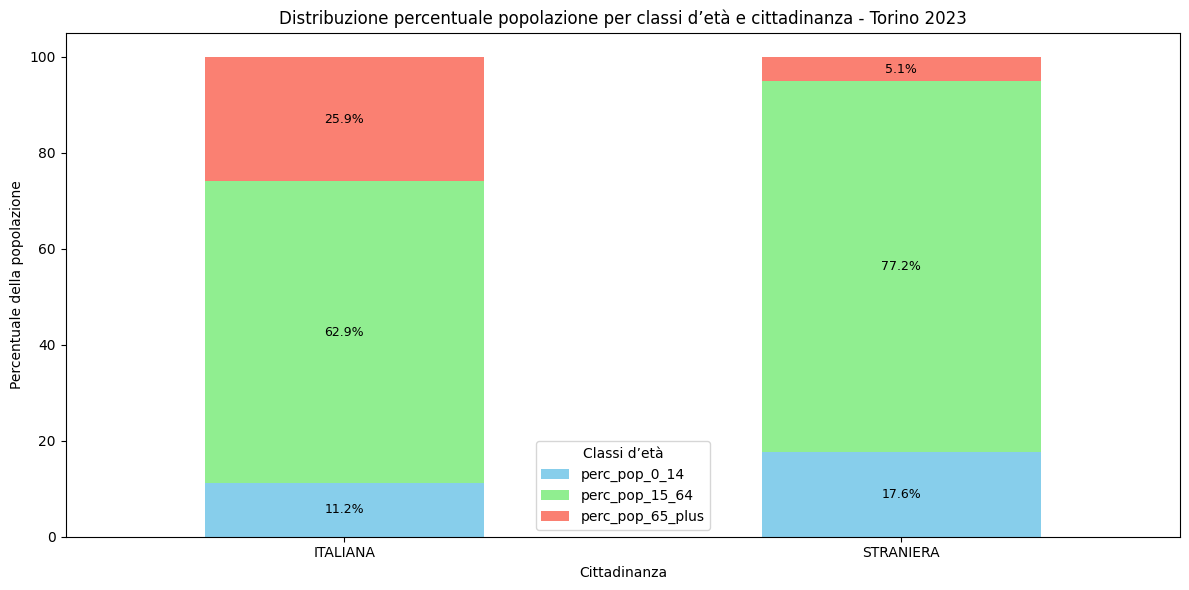

In [37]:
# Distribuzione percentuale popolazione per classi d’età e cittadinanza - Torino 2023
df_plot = df_torino_2023_clean.set_index('cittadinanza').loc[['ITALIANA', 'STRANIERA']]

# Seleziona solo le colonne delle percentuali
data = df_plot[['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']]

# Crea il grafico
ax = data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'lightgreen', 'salmon']
)

plt.title('Distribuzione percentuale popolazione per classi d’età e cittadinanza - Torino 2023')
plt.xlabel('Cittadinanza')          
plt.ylabel('Percentuale della popolazione')
plt.xticks(rotation=0)
plt.legend(title='Classi d’età')

# Aggiungi etichette dentro i blocchi
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

plt.tight_layout()
plt.show()



Dal grafico a barre qui sopra si osserva che la percentuale della popolazione per la fascia d'età >= 65 anni per quanto riguarda i cittadini stranieri è molto più bassa rispetto a quella degli italiani, il che suggerisce una popolazione straniera più giovane.

In [38]:
# Calcolo del totale maschi e femmine per ciascuna cittadinanza a Torino nel 2023
df_genere = df_torino_2023_clean.copy()
df_genere['maschi'] = df_genere[['maschi_0_14', 'maschi_15_64', 'maschi_over_65']].sum(axis=1)
df_genere['femmine'] = df_genere[['femmine_0_14', 'femmine_15_64', 'femmine_over_65']].sum(axis=1)

# Visualizzazione dei valori
df_genere[['cittadinanza', 'maschi', 'femmine']]


,cittadinanza,maschi,femmine
339,ITALIANA,409972,441227
664,STRANIERA,65261,64687


### Grafico Ripartizione della popolazione per genere e cittadinanza - Torino (2023)

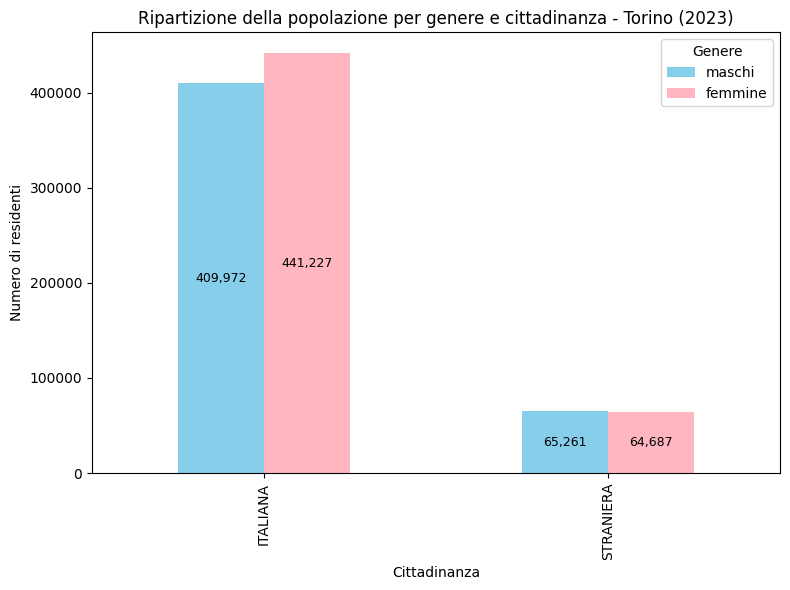

In [39]:
# Seleziono solo le colonne che mi interessano e imposto l'indice
df_genere_plot = df_genere[['cittadinanza', 'maschi', 'femmine']].set_index('cittadinanza')

# Creo il grafico
ax = df_genere_plot.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Aggiungo etichette all’interno delle barre
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height):,}',        # formato con separatore migliaia
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

# Aggiungo titolo e etichette
plt.title('Ripartizione della popolazione per genere e cittadinanza - Torino (2023)')
plt.xlabel('Cittadinanza')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


In [40]:
# calcolo la percentuale di donne in più rispetto al numero di uomini
round((441227 -  409972) / 409972 * 100,2)

7.62

Dal grafico a barre qui sopra si osserva che la popolazione italiana è composta da un numero maggiore di donne rispetto agli uomini <b>(+ 7.62%)</b>, mentre la popolazione straniera ha una distribuzione più equilibrata tra i due generi, con una leggera prevalenza di uomini.

### Grafico Ripartizione della popolazione per genere e fascia d’età - Torino (2023)

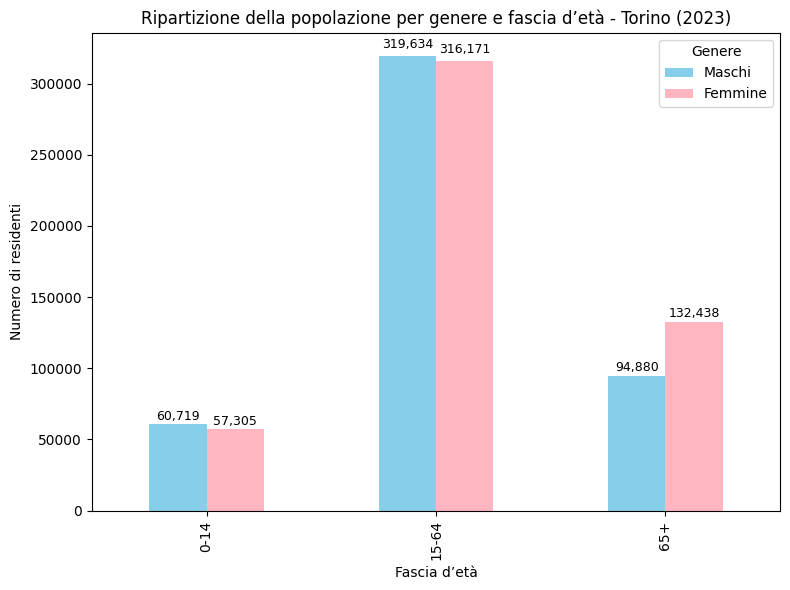

In [41]:
# 1. Seleziono solo le colonne rilevanti e sommo tutto (italiani + stranieri)
df_eta_genere = df_torino_2023_clean.copy()

# Sommo i dati per ciascun genere e fascia d'età (somma su tutte le cittadinanze)
totali = {
    'maschi_0_14': df_eta_genere['maschi_0_14'].sum(),
    'maschi_15_64': df_eta_genere['maschi_15_64'].sum(),
    'maschi_over_65': df_eta_genere['maschi_over_65'].sum(),
    'femmine_0_14': df_eta_genere['femmine_0_14'].sum(),
    'femmine_15_64': df_eta_genere['femmine_15_64'].sum(),
    'femmine_over_65': df_eta_genere['femmine_over_65'].sum(),
}

# 2. Creo un DataFrame con la struttura desiderata
df_plot = pd.DataFrame({
    '0-14': [totali['maschi_0_14'], totali['femmine_0_14']],
    '15-64': [totali['maschi_15_64'], totali['femmine_15_64']],
    '65+': [totali['maschi_over_65'], totali['femmine_over_65']],
}, index=['Maschi', 'Femmine'])

# 3. Plot
ax = df_plot.T.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Aggiungi etichette sopra le barre
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (height * 0.01),
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Personalizza grafico
plt.title('Ripartizione della popolazione per genere e fascia d’età - Torino (2023)')
plt.xlabel('Fascia d’età')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


In [42]:
df_eta_genere[['maschi_0_14', 'femmine_0_14', 'maschi_15_64', 'femmine_15_64', 'maschi_over_65', 'femmine_over_65']].sum()

maschi_0_14         60719
femmine_0_14        57305
maschi_15_64       319634
femmine_15_64      316171
maschi_over_65      94880
femmine_over_65    132438
dtype: Int64

In [43]:
# Calcolo la percentuale di popolazione femminile in più rispetto al numero di uomini 
# nella fascia 65+ realtiva all'anno 2023 a Torino
round((132438 - 94880) / 94880 * 100,2)

39.58

Dal grafico a barre si osserva che la popolazione maschile e femminile è distribuita in modo relativamente equilibrato nelle diverse fasce d'età, con un'alta predominanza di donne nella fascia > 65 anni.

In [44]:
### Mostro la colonna riguardante  il comune di Torino
df_torino_anni = df[df['comune'] == 'TORINO']
df_torino_anni.drop_duplicates()


,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
184,2021,1272,TORINO,ITC11,TORINO,ITALIANA,51102,48251,263725,264787,92235,128648,848748,41.79,50.0
214,2020,1272,TORINO,ITC11,TORINO,STRANIERA,12567,11624,48225,50615,1780,3421,128232,5.26,50.0
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
637,2022,1272,TORINO,ITC11,TORINO,STRANIERA,12029,11269,49116,49329,2145,3943,127831,6.18,50.0
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5
762,2022,1272,TORINO,ITC11,TORINO,ITALIANA,49909,47241,264597,265338,92212,128101,847398,41.57,50.0
896,2019,1272,TORINO,ITC11,TORINO,STRANIERA,12290,11422,45535,49420,1696,3289,123652,5.25,49.5
3493,2019,1272,TORINO,ITC11,TORINO,ITALIANA,52390,49390,264011,268761,93041,130317,857910,41.92,50.0
3905,2020,1272,TORINO,ITC11,TORINO,ITALIANA,52224,49194,265448,269238,92433,129668,858205,41.54,50.0
4276,2021,1272,TORINO,ITC11,TORINO,STRANIERA,12278,11438,47643,47905,1908,3404,124576,5.56,50.0


### Grafico Popolazione residente a Torino per cittadinanza (2019–2023)

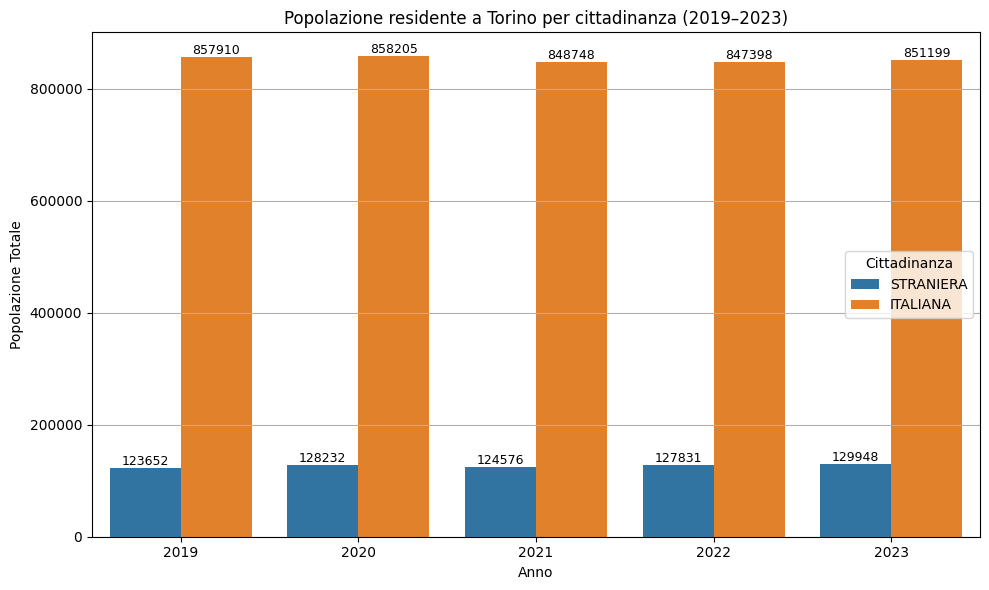

In [45]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_torino_anni, x='anno', y='popolazione_totale', hue='cittadinanza')

# Aggiungo etichette sopra ogni barra
for bars in barplot.containers:
    for bar in bars:
        height = bar.get_height()
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Aggiungi titoli e griglia
plt.title("Popolazione residente a Torino per cittadinanza (2019–2023)")
plt.xlabel("Anno")
plt.ylabel("Popolazione Totale")
plt.legend(title="Cittadinanza")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
# Calcolo la variazione percentuale della popolazione totale di Torino di stranieri da 2019 al 2020
round((128232 - 123652) / 123652 * 100 ,2)


3.7

Da questo grafico si nota un incremento della popolazione straniera residente a Torino dal 2019 al 2023, con un aumento significativo nel 2020 (passa da 123652 unità a 128232 unità <b>+3.7%</b>), probabilmente dovuto a fattori migratori e all'attrattività della città per i nuovi residenti stranieri.

In [47]:
### Mostro la colonna riguardante  il comune di Torino
df_torino_anni = df[df['comune'] == 'TORINO']
df_torino_anni.drop_duplicates()


,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
184,2021,1272,TORINO,ITC11,TORINO,ITALIANA,51102,48251,263725,264787,92235,128648,848748,41.79,50.0
214,2020,1272,TORINO,ITC11,TORINO,STRANIERA,12567,11624,48225,50615,1780,3421,128232,5.26,50.0
339,2023,1272,TORINO,ITC11,TORINO,ITALIANA,48882,46236,268580,266841,92510,128150,851199,41.21,50.0
637,2022,1272,TORINO,ITC11,TORINO,STRANIERA,12029,11269,49116,49329,2145,3943,127831,6.18,50.0
664,2023,1272,TORINO,ITC11,TORINO,STRANIERA,11837,11069,51054,49330,2370,4288,129948,6.63,49.5
762,2022,1272,TORINO,ITC11,TORINO,ITALIANA,49909,47241,264597,265338,92212,128101,847398,41.57,50.0
896,2019,1272,TORINO,ITC11,TORINO,STRANIERA,12290,11422,45535,49420,1696,3289,123652,5.25,49.5
3493,2019,1272,TORINO,ITC11,TORINO,ITALIANA,52390,49390,264011,268761,93041,130317,857910,41.92,50.0
3905,2020,1272,TORINO,ITC11,TORINO,ITALIANA,52224,49194,265448,269238,92433,129668,858205,41.54,50.0
4276,2021,1272,TORINO,ITC11,TORINO,STRANIERA,12278,11438,47643,47905,1908,3404,124576,5.56,50.0


### Calcoliamo l'indice di dipendenza degli anziani (IDA) per Torino tra gli anni 2019 e 2023

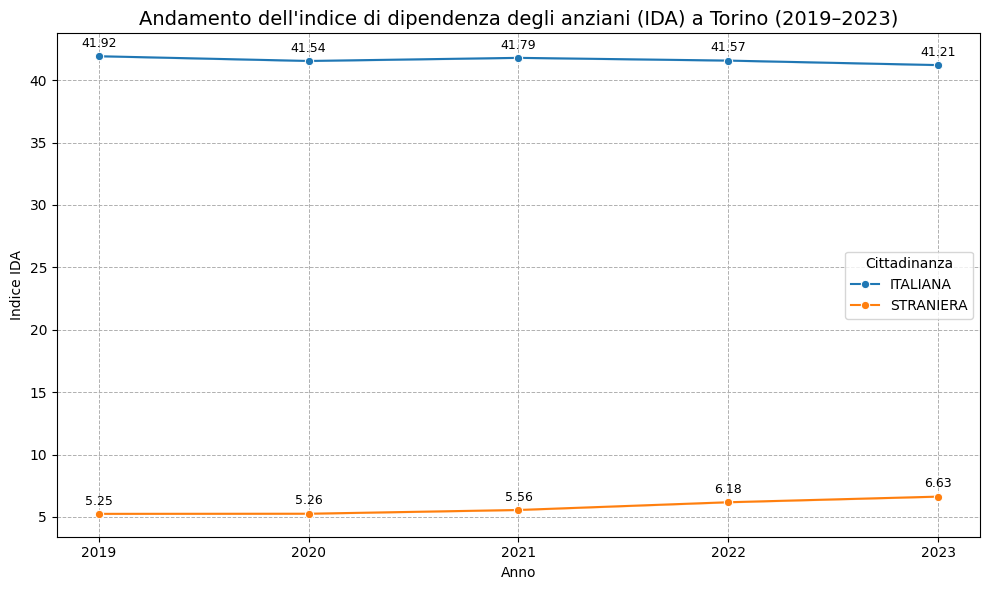

In [48]:

# Creazione del lineplot per l'indice di dipendenza degli anziani (IDA) a Torino
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df_torino_anni,
    x='anno',
    y='indice_anziani',
    hue='cittadinanza',
    marker='o'
)

# Aggiunta delle etichette numeriche sui punti
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_val, y_val + 0.5, f'{y_val:.2f}', ha='center', va='bottom', fontsize=9)

# Personalizzazione asse X e layout
plt.title("Andamento dell'indice di dipendenza degli anziani (IDA) a Torino (2019–2023)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Indice IDA")
plt.xticks(ticks=sorted(df_torino_anni['anno'].unique()))
plt.grid(True,linestyle='--', linewidth=0.7)
plt.legend(title="Cittadinanza")
plt.tight_layout()

# Mostra il grafico
plt.show()


Il grafico mostra L’IDA (Indice di Dipendenza degli Anziani) per il comune di Torino. 
Su può notare che, tra gli Italiani, si mantiene molto alto (oltre il 40%), con variazioni minime.

L’IDA tra gli Stranieri è molto più basso (5–7%) ma in lieve aumento negli anni.

Questo è coerente con la realtà demografica: la popolazione straniera è generalmente più giovane.

In [49]:
df_torino_2023_clean.columns

Index(['anno', 'codice_istat', 'comune', 'cod_nuts', 'provincia',
       'cittadinanza', 'maschi_0_14', 'femmine_0_14', 'maschi_15_64',
       'femmine_15_64', 'maschi_over_65', 'femmine_over_65',
       'popolazione_totale', 'indice_anziani', 'eta_mediana', 'pop_0_14',
       'pop_15_64', 'pop_65_plus', 'perc_pop_0_14', 'perc_pop_15_64',
       'perc_pop_65_plus'],
      dtype='object')

# Comune di Alessandria

In [50]:
### Mostro la colonna riguardante  il comune di Alessandria
df_alessandria = df[df['comune'] == 'ALESSANDRIA']
df_alessandria


,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
225,2020,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5680,5191,28416,28151,9944,13707,91089,41.81,50.0
724,2020,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1450,1376,5548,5363,247,430,14414,6.20,47.5
954,2022,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1465,1375,5708,5261,274,469,14552,6.77,47.0
1390,2019,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1353,1293,5411,5304,227,441,14029,6.23,47.0
1993,2021,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1401,1331,5418,5046,237,403,13836,6.12,47.0
3506,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1437,1342,6046,5298,291,513,14927,7.09,47.5
4077,2019,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5733,5295,29039,28839,10062,13908,92876,41.41,50.0
4532,2021,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5599,5180,28415,27876,10058,13697,90825,42.20,50.0
4739,2022,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5544,5136,28658,28150,10118,13717,91323,41.96,50.0
5425,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5529,5133,29033,28155,10203,13801,91854,41.97,50.0


In [51]:
df_alessandria_2023 = df_alessandria[df_alessandria['anno'] == 2023]
df_alessandria_2023

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
3506,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1437,1342,6046,5298,291,513,14927,7.09,47.5
5425,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5529,5133,29033,28155,10203,13801,91854,41.97,50.0
5887,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1437,1342,6046,5298,291,513,14927,7.09,47.5
9970,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5529,5133,29033,28155,10203,13801,91854,41.97,50.0
13694,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1437,1342,6046,5298,291,513,14927,7.09,47.5
15613,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5529,5133,29033,28155,10203,13801,91854,41.97,50.0


In [52]:
# Rimuovo i duplicati dal DataFrame df_alessandria_2023
df_alessandria_2023_clean = df_alessandria_2023.drop_duplicates()


In [53]:
df_alessandria_2023_clean['popolazione_totale'].sum()
print(f"Popolazione totale di Alessandria nel 2023: {df_alessandria_2023_clean['popolazione_totale'].sum()}")

Popolazione totale di Alessandria nel 2023: 106781


> ℹ️ **Nota**: La popolazione totale di Alessandria nel 2023 risultante dal dataset è pari a **106.781** abitanti.  
> Tuttavia, secondo i dati ufficiali ISTAT (al 1° gennaio 2023), la popolazione residente è pari a **93.584**.  
> Questa discrepanza può essere dovuta a **diverse fonti, aggiornamenti o metodologie di rilevazione**.


Calcolo popolazione per fascia d'età (somma maschi + femmine) per il comune di Alessandria nel 2023:

In [54]:
df.columns

Index(['anno', 'codice_istat', 'comune', 'cod_nuts', 'provincia',
       'cittadinanza', 'maschi_0_14', 'femmine_0_14', 'maschi_15_64',
       'femmine_15_64', 'maschi_over_65', 'femmine_over_65',
       'popolazione_totale', 'indice_anziani', 'eta_mediana'],
      dtype='object')

In [55]:
df_alessandria_2023_clean = df_alessandria_2023_clean.copy()

df_alessandria_2023_clean['pop_0_14'] = df_alessandria_2023_clean['maschi_0_14'] + df_alessandria_2023_clean['femmine_0_14']
df_alessandria_2023_clean['pop_15_64'] = df_alessandria_2023_clean['maschi_15_64'] + df_alessandria_2023_clean['femmine_15_64']
df_alessandria_2023_clean['pop_65_plus'] = df_alessandria_2023_clean['maschi_over_65'] + df_alessandria_2023_clean['femmine_over_65']

# Ora calcolo la percentuale rispetto alla popolazione totale
df_alessandria_2023_clean['perc_pop_0_14'] = df_alessandria_2023_clean['pop_0_14'] / df_alessandria_2023_clean['popolazione_totale'] * 100
df_alessandria_2023_clean['perc_pop_15_64'] = df_alessandria_2023_clean['pop_15_64'] / df_alessandria_2023_clean['popolazione_totale'] * 100
df_alessandria_2023_clean['perc_pop_65_plus'] = df_alessandria_2023_clean['pop_65_plus'] / df_alessandria_2023_clean['popolazione_totale'] * 100


In [56]:
colonne_da_convertire = ['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']
for col in colonne_da_convertire:
    df_alessandria_2023_clean[col] = pd.to_numeric(df_alessandria_2023_clean[col], errors='coerce').astype('float64')

In [57]:
df_alessandria_2023_clean[['cittadinanza', 'perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']].head()

,cittadinanza,perc_pop_0_14,perc_pop_15_64,perc_pop_65_plus
3506,STRANIERA,18.617271,75.996516,5.386213
5425,ITALIANA,11.607551,62.259673,26.132776


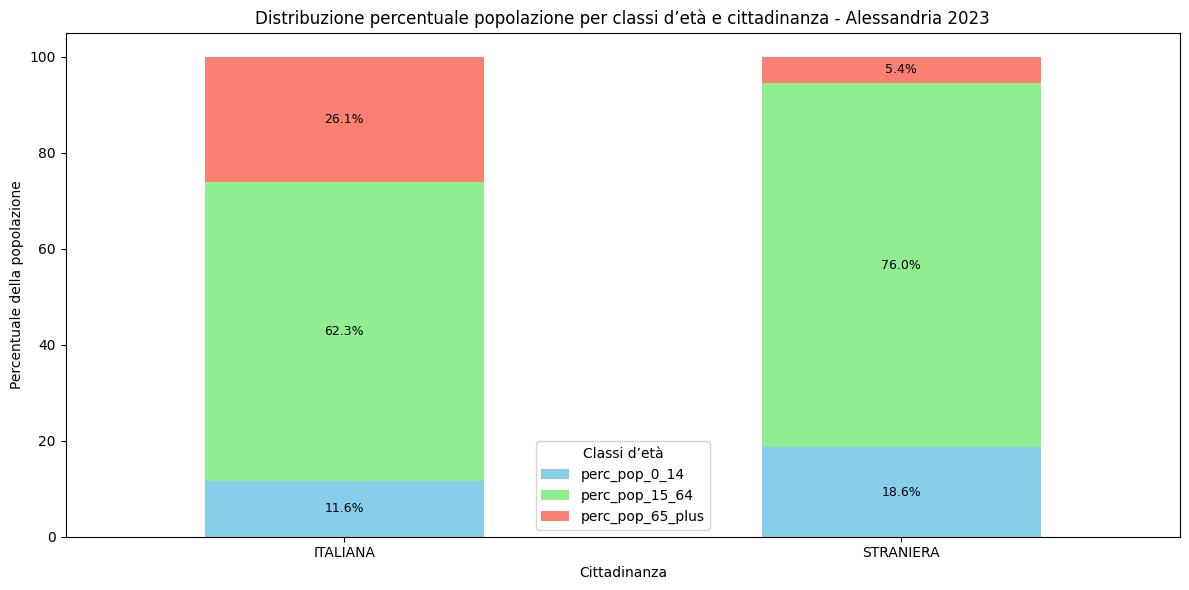

In [58]:
# Distribuzione percentuale popolazione per classi d’età e cittadinanza - Alessandria 2023
# Ordina le categorie
df_plot = df_alessandria_2023_clean.set_index('cittadinanza').loc[['ITALIANA', 'STRANIERA']]

# Seleziona solo le colonne delle percentuali
data = df_plot[['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']]

# Crea il grafico
ax = data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'lightgreen', 'salmon']
)

plt.title('Distribuzione percentuale popolazione per classi d’età e cittadinanza - Alessandria 2023')
plt.xlabel('Cittadinanza')          
plt.ylabel('Percentuale della popolazione')
plt.xticks(rotation=0)
plt.legend(title='Classi d’età')

# Aggiungi etichette dentro i blocchi
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

plt.tight_layout()
plt.show()


Dal grafico a barre si osserva che la popolazione di Alessandria per quanto riguarda la fascia d'età >= 65 anni nella popolazione italiana, è molto più elevata rispetto a quella della stessa fascia d'età nella popolazione straniera, suggerendo una popolazione straniera più giovane.

In [59]:
# Calcolo del totale maschi e femmine per ciascuna cittadinanza a Alessandria nel 2023
df_genere = df_alessandria_2023_clean.copy()
df_genere['maschi'] = df_genere[['maschi_0_14', 'maschi_15_64', 'maschi_over_65']].sum(axis=1)
df_genere['femmine'] = df_genere[['femmine_0_14', 'femmine_15_64', 'femmine_over_65']].sum(axis=1)

# Visualizzazione dei valori
df_genere[['cittadinanza', 'maschi', 'femmine']]

,cittadinanza,maschi,femmine
3506,STRANIERA,7774,7153
5425,ITALIANA,44765,47089


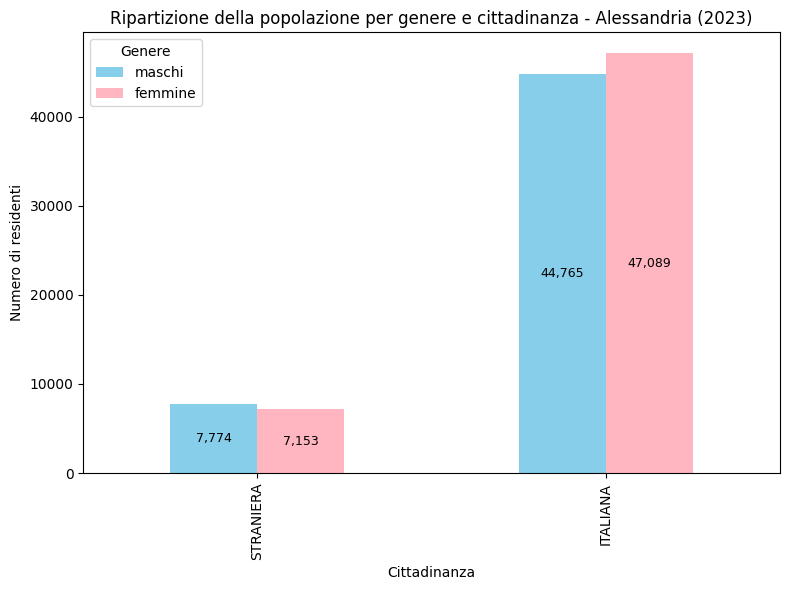

In [60]:
# Seleziono solo le colonne che mi interessano e imposto l'indice
df_genere_plot = df_genere[['cittadinanza', 'maschi', 'femmine']].set_index('cittadinanza')

# Creo il grafico
ax = df_genere_plot.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Aggiungo etichette all’interno delle barre
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height):,}',        # formato con separatore migliaia
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

# Aggiungo titolo e etichette
plt.title('Ripartizione della popolazione per genere e cittadinanza - Alessandria (2023)')
plt.xlabel('Cittadinanza')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


In [61]:
# Percentuale di donne in più rispetto al numero di uomini nella popolazione di Alessandria nel 2023
# nella popolazione italiana
round((47089 - 44765) / 44765 * 100,2)

5.19

dal grafico a barre si osserva che la ripartizione della popolazione per genere e cittadinanza nel comune di Alessandria nel 2023 è equilibrata, con una leggera predominanza di donne tra gli italiani <b>(+ 5.19%)</b> e una distribuzione più equilibrata tra uomini e donne tra gli stranieri.

### Grafico Ripartizione della popolazione per genere e fascia d’età - Alessandria (2023)

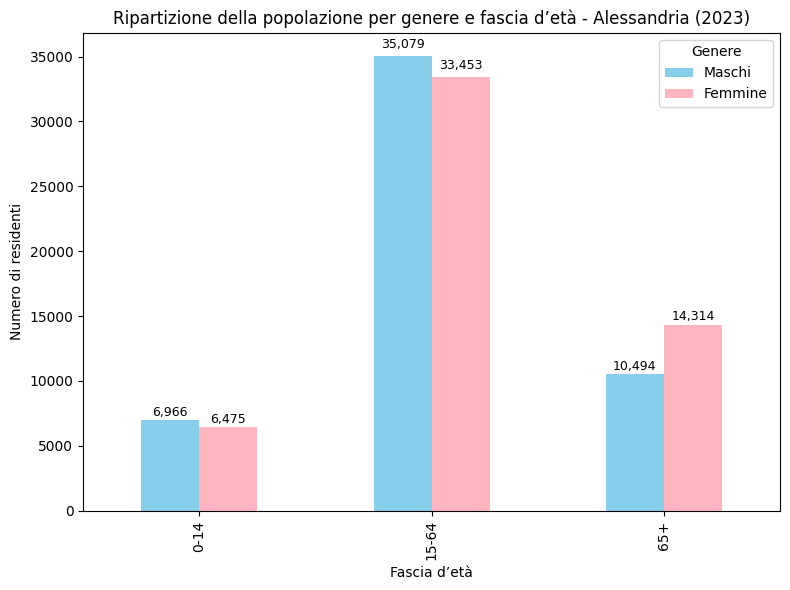

In [62]:
# 1. Seleziono solo le colonne rilevanti e sommo tutto (italiani + stranieri)
df_eta_genere = df_alessandria_2023_clean.copy()

# Sommo i dati per ciascun genere e fascia d'età
totali = {
    'maschi_0_14': df_eta_genere['maschi_0_14'].sum(),
    'maschi_15_64': df_eta_genere['maschi_15_64'].sum(),
    'maschi_over_65': df_eta_genere['maschi_over_65'].sum(),
    'femmine_0_14': df_eta_genere['femmine_0_14'].sum(),
    'femmine_15_64': df_eta_genere['femmine_15_64'].sum(),
    'femmine_over_65': df_eta_genere['femmine_over_65'].sum(),
}

# 2. Creo un DataFrame per il plot
df_plot = pd.DataFrame({
    '0-14': [totali['maschi_0_14'], totali['femmine_0_14']],
    '15-64': [totali['maschi_15_64'], totali['femmine_15_64']],
    '65+': [totali['maschi_over_65'], totali['femmine_over_65']],
}, index=['Maschi', 'Femmine'])

# 3. Plot con etichette
ax = df_plot.T.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Etichette numeriche sopra le barre
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (height * 0.01),
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Personalizza grafico
plt.title('Ripartizione della popolazione per genere e fascia d’età - Alessandria (2023)')
plt.xlabel('Fascia d’età')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


Dal grafico a barre si osserva che la popolazione maschile e femminile ad Alessandria nel 2023 è distribuita in modo relativamente equilibrato nelle diverse fasce d'età, con una leggera predominanza di donne nella fascia > 65 anni, simile a quanto osservato per Torino.

In [63]:
### Mostro la colonna riguardante  il comune di Alessandria
df_alessandria_anni = df[df['comune'] == 'ALESSANDRIA']
df_alessandria_anni.drop_duplicates()

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
225,2020,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5680,5191,28416,28151,9944,13707,91089,41.81,50.0
724,2020,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1450,1376,5548,5363,247,430,14414,6.20,47.5
954,2022,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1465,1375,5708,5261,274,469,14552,6.77,47.0
1390,2019,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1353,1293,5411,5304,227,441,14029,6.23,47.0
1993,2021,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1401,1331,5418,5046,237,403,13836,6.12,47.0
3506,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,STRANIERA,1437,1342,6046,5298,291,513,14927,7.09,47.5
4077,2019,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5733,5295,29039,28839,10062,13908,92876,41.41,50.0
4532,2021,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5599,5180,28415,27876,10058,13697,90825,42.20,50.0
4739,2022,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5544,5136,28658,28150,10118,13717,91323,41.96,50.0
5425,2023,6003,ALESSANDRIA,ITC18,ALESSANDRIA,ITALIANA,5529,5133,29033,28155,10203,13801,91854,41.97,50.0


### Grafico Popolazione residente a Alessandria per cittadinanza (2019–2023)

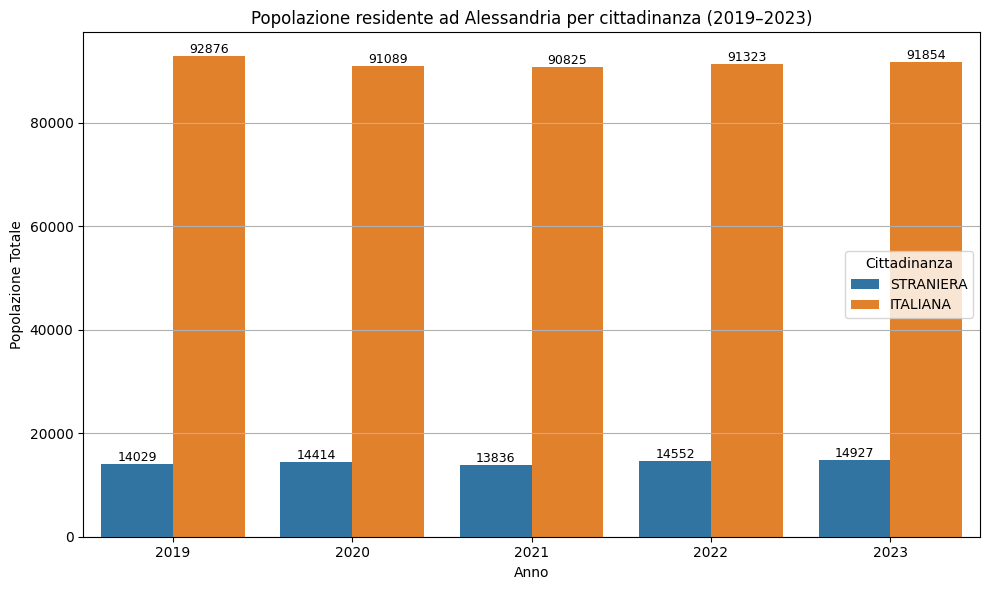

In [64]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_alessandria_anni, x='anno', y='popolazione_totale', hue='cittadinanza')

# Aggiungo etichette sopra ogni barra
for bars in barplot.containers:
    for bar in bars:
        height = bar.get_height()
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Aggiungi titoli e griglia
plt.title("Popolazione residente ad Alessandria per cittadinanza (2019–2023)")
plt.xlabel("Anno")
plt.ylabel("Popolazione Totale")
plt.legend(title="Cittadinanza")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
round((92876 - 91854) / 91854 * 100,2)

1.11

In [66]:
round((14927 - 14029) / 14029 * 100,2)

6.4

Dal grafico a barre qui sopra si osserva che la popolazione straniera ad Alessandria dal 2019 al 2023 è aumentata del <b>6,4%</b>. gli italiani sono in lieve calo <b>(-1.11%)</b>.

### Calcoliamo l'indice di dipendenza degli anziani (IDA) per Alessandria tra gli anni 2019 e 2023

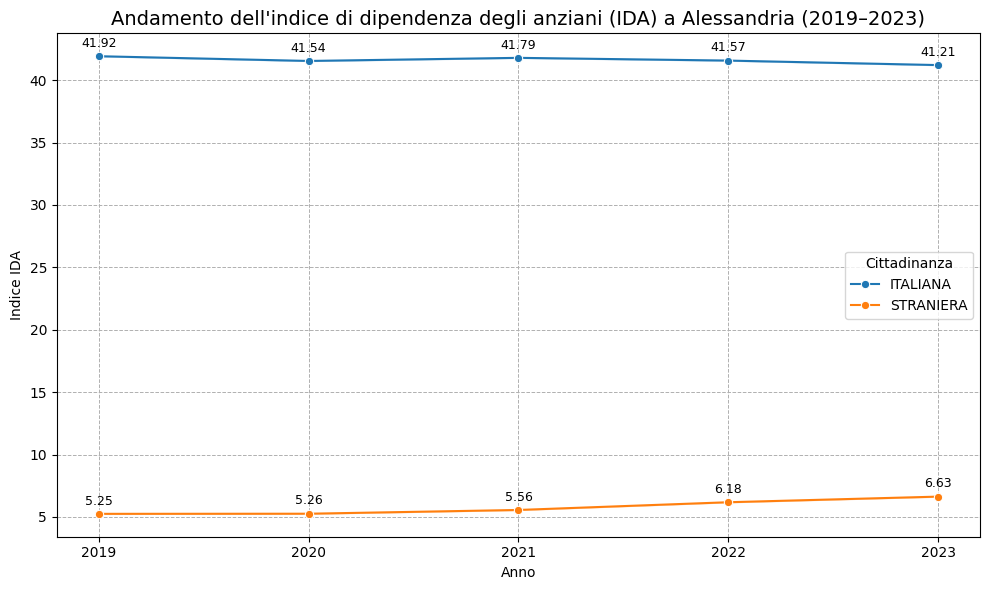

In [67]:
# Creazione del lineplot per l'indice di dipendenza degli anziani (IDA) a Alessandria
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df_torino_anni,
    x='anno',
    y='indice_anziani',
    hue='cittadinanza',
    marker='o'
)

# Aggiunta delle etichette numeriche sui punti
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_val, y_val + 0.5, f'{y_val:.2f}', ha='center', va='bottom', fontsize=9)

# Personalizzazione asse X e layout
plt.title("Andamento dell'indice di dipendenza degli anziani (IDA) a Alessandria (2019–2023)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Indice IDA")
plt.xticks(ticks=sorted(df_torino_anni['anno'].unique()))
plt.grid(True,linestyle='--', linewidth=0.7)
plt.legend(title="Cittadinanza")
plt.tight_layout()

# Mostra il grafico
plt.show()

Dal grafico a linee si osserva che l'IDA (Indice di Dipendenza degli Anziani) per il comune di Alessandria è molto più alto tra gli Italiani (oltre il 40%) rispetto agli Stranieri (5–7%). C'è una leggera tendenza all'aumento dell'IDA tra gli Stranieri, ma rimane comunque molto più basso rispetto agli Italiani. Questo suggerisce una popolazione straniera più giovane.

# Comune di Casale Monferrato

In [68]:
### Mostro la colonna riguardante  il comune di Casale Monferrato
df_casale = df[df['comune'] == 'CASALE MONFERRATO']
df_casale_2023 = df_casale[df_casale['anno'] == 2023]
df_casale_2023_clean = df_casale_2023.drop_duplicates() 
df_casale_2023_clean

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
2341,2023,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1661,1527,9948,10106,3777,5201,32220,44.77,50.0
5542,2023,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,339,283,1311,1398,103,196,3630,11.04,45.0


In [69]:
df['popolazione_totale'].sum()
print(f"Popolazione totale di Casale Monferrato nel 2023: {df_casale_2023_clean['popolazione_totale'].sum()}")


Popolazione totale di Casale Monferrato nel 2023: 35850


In [70]:
df_casale_2023_clean = df_casale_2023_clean.copy()

df_casale_2023_clean['pop_0_14'] = df_casale_2023_clean['maschi_0_14'] + df_casale_2023_clean['femmine_0_14']
df_casale_2023_clean['pop_15_64'] = df_casale_2023_clean['maschi_15_64'] + df_casale_2023_clean['femmine_15_64']
df_casale_2023_clean['pop_65_plus'] = df_casale_2023_clean['maschi_over_65'] + df_casale_2023_clean['femmine_over_65']

# Ora calcolo la percentuale rispetto alla popolazione totale
df_casale_2023_clean['perc_pop_0_14'] = df_casale_2023_clean['pop_0_14'] / df_casale_2023_clean['popolazione_totale'] * 100
df_casale_2023_clean['perc_pop_15_64'] = df_casale_2023_clean['pop_15_64'] / df_casale_2023_clean['popolazione_totale'] * 100
df_casale_2023_clean['perc_pop_65_plus'] = df_casale_2023_clean['pop_65_plus'] / df_casale_2023_clean['popolazione_totale'] * 100


In [71]:
colonne_da_convertire = ['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']
for col in colonne_da_convertire:
    df_casale_2023_clean[col] = pd.to_numeric(df_casale_2023_clean[col], errors='coerce').astype('float64')

In [72]:
df_casale_2023_clean[['cittadinanza', 'perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']].head()

,cittadinanza,perc_pop_0_14,perc_pop_15_64,perc_pop_65_plus
2341,ITALIANA,9.894475,62.240844,27.864680
5542,STRANIERA,17.134986,74.628099,8.236915


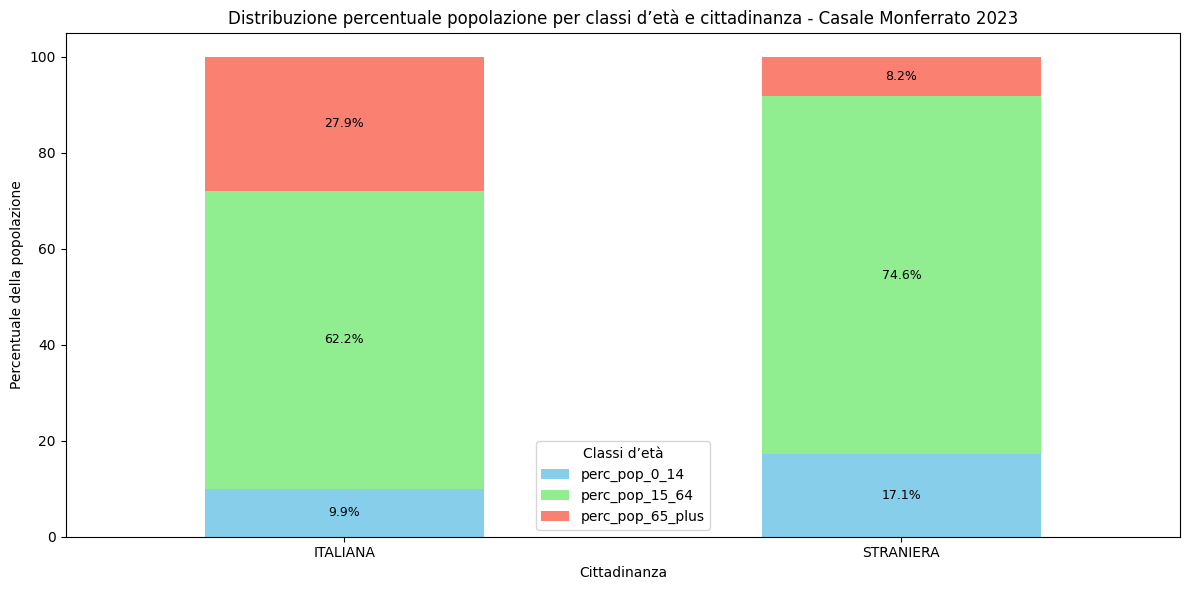

In [73]:
# Distribuzione percentuale popolazione per classi d’età e cittadinanza - Casale Monferrato 2023
df_plot = df_casale_2023_clean.set_index('cittadinanza').loc[['ITALIANA', 'STRANIERA']]

# Seleziona solo le colonne delle percentuali
data = df_plot[['perc_pop_0_14', 'perc_pop_15_64', 'perc_pop_65_plus']]

# Crea il grafico
ax = data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'lightgreen', 'salmon']
)

plt.title('Distribuzione percentuale popolazione per classi d’età e cittadinanza - Casale Monferrato 2023')
plt.xlabel('Cittadinanza')          
plt.ylabel('Percentuale della popolazione')
plt.xticks(rotation=0)
plt.legend(title='Classi d’età')

# Aggiungi etichette dentro i blocchi
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

plt.tight_layout()
plt.show()


In [74]:
# Calcolo del totale maschi e femmine per ciascuna cittadinanza a Casale Monferrato nel 2023
df_genere = df_casale_2023_clean.copy()
df_genere['maschi'] = df_genere[['maschi_0_14', 'maschi_15_64', 'maschi_over_65']].sum(axis=1)
df_genere['femmine'] = df_genere[['femmine_0_14', 'femmine_15_64', 'femmine_over_65']].sum(axis=1)

# Visualizzazione dei valori
df_genere[['cittadinanza', 'maschi', 'femmine']]


,cittadinanza,maschi,femmine
2341,ITALIANA,15386,16834
5542,STRANIERA,1753,1877


### Grafico Ripartizione della popolazione per genere e cittadinanza - Casale (2023)

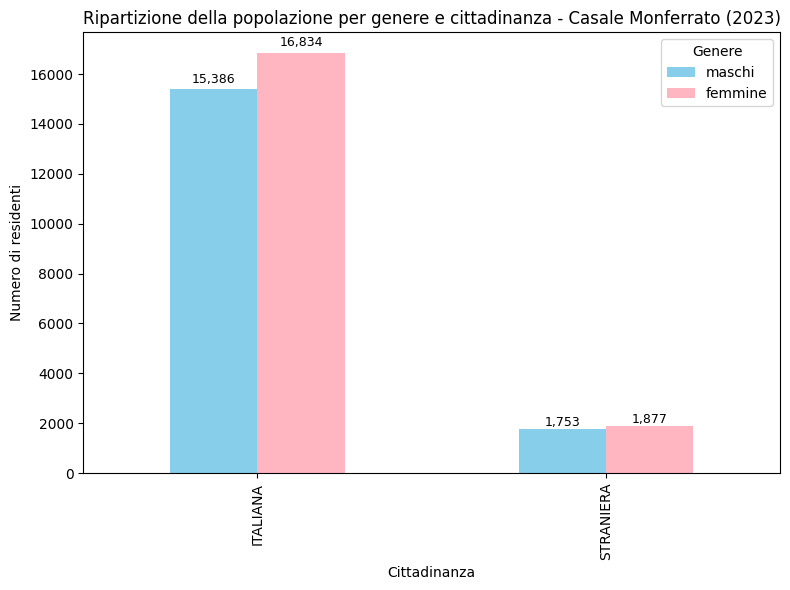

In [75]:
# Seleziono solo le colonne che mi interessano e imposto l'indice
df_genere_plot = df_genere[['cittadinanza', 'maschi', 'femmine']].set_index('cittadinanza')

# Creo il grafico
ax = df_genere_plot.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Etichette numeriche sopra le barre
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (height * 0.01),
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Aggiungo titolo e etichette
plt.title('Ripartizione della popolazione per genere e cittadinanza - Casale Monferrato (2023)')
plt.xlabel('Cittadinanza')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()



In [76]:
# Percentuale di donne in più rispetto al numero di uomini nella popolazione di Casale Monferrato nel 2023
# tra la popolazione italiana
round((16834 - 15386) / 15386 * 100,2)

9.41

Dal grafico si osserva che la ripartizione della popolazione per genere e cittadinanza a Casale Monferrato nel 2023 mostra una predominanza di donne rispetto agli uomini, sia tra gli italiani che tra gli stranieri. Tra gli italiani, la percentuale di donne è superiore del <b>+ 9.4%</b>, mentre tra gli stranieri la differenza è più contenuta.

### Grafico Ripartizione della popolazione per genere e fascia d’età - Casale Monferrato (2023)

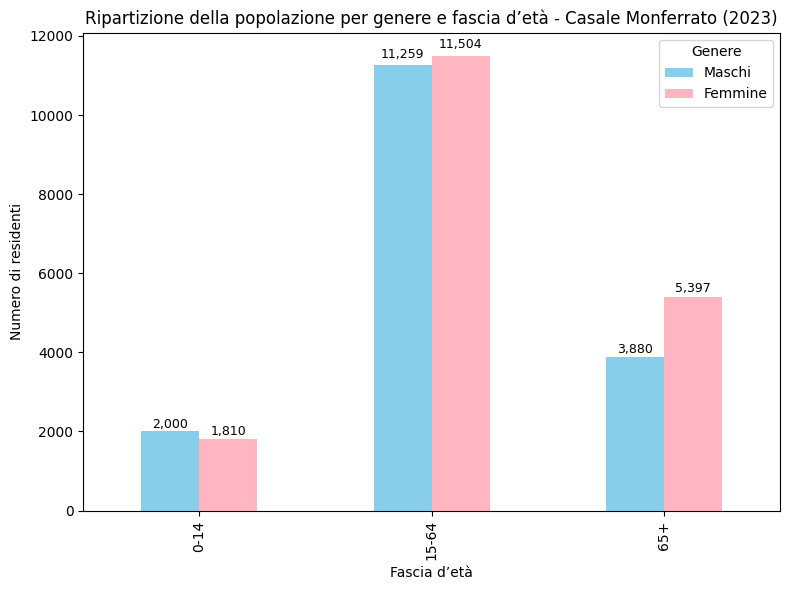

In [77]:
# 1. Seleziono solo le colonne rilevanti e sommo tutto (italiani + stranieri)
df_eta_genere = df_casale_2023_clean.copy()

# Sommo i dati per ciascun genere e fascia d'età (somma su tutte le cittadinanze)
totali = {
    'maschi_0_14': df_eta_genere['maschi_0_14'].sum(),
    'maschi_15_64': df_eta_genere['maschi_15_64'].sum(),
    'maschi_over_65': df_eta_genere['maschi_over_65'].sum(),
    'femmine_0_14': df_eta_genere['femmine_0_14'].sum(),
    'femmine_15_64': df_eta_genere['femmine_15_64'].sum(),
    'femmine_over_65': df_eta_genere['femmine_over_65'].sum(),
}

# 2. Creo un DataFrame con la struttura desiderata
df_plot = pd.DataFrame({
    '0-14': [totali['maschi_0_14'], totali['femmine_0_14']],
    '15-64': [totali['maschi_15_64'], totali['femmine_15_64']],
    '65+': [totali['maschi_over_65'], totali['femmine_over_65']],
}, index=['Maschi', 'Femmine'])

# 3. Plot
ax = df_plot.T.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightpink'])

# Etichette numeriche sopra le barre
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + (height * 0.01),
                f'{int(height):,}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Aggiungo titolo e etichette
plt.title('Ripartizione della popolazione per genere e fascia d’età - Casale Monferrato (2023)')
plt.xlabel('Fascia d’età')
plt.ylabel('Numero di residenti')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()


In [78]:
round((5397 - 3880) / 3880 * 100,2)

39.1

Dal grafico si osserva che la ripartizione della popolazione per genere e fascia d’età a Casale Monferrato nel 2023 mostra una predominanza di donne rispetto agli uomini, sopratutto nella fascia di età > 65 anni (<b>+ 39.1%</b>).

In [79]:
### Mostro la colonna riguardante  il comune di Casale Monferrato
df_casale_anni = df[df['comune'] == 'CASALE MONFERRATO']
df_casale_anni.drop_duplicates()

,anno,codice_istat,comune,cod_nuts,provincia,cittadinanza,maschi_0_14,femmine_0_14,maschi_15_64,femmine_15_64,maschi_over_65,femmine_over_65,popolazione_totale,indice_anziani,eta_mediana
262,2019,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1765,1656,10382,10760,3737,5293,33593,42.71,50.0
807,2020,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,319,304,1270,1480,93,155,3621,9.02,46.0
1119,2019,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,312,296,1302,1527,94,157,3688,8.87,46.5
1504,2021,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1672,1625,9992,10234,3728,5148,32399,43.88,50.0
2341,2023,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1661,1527,9948,10106,3777,5201,32220,44.77,50.0
3112,2022,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1666,1557,9992,10194,3739,5172,32320,44.14,50.0
4293,2020,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,ITALIANA,1707,1637,10013,10380,3722,5182,32641,43.66,50.0
5426,2021,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,322,303,1260,1408,86,139,3518,8.43,45.0
5542,2023,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,339,283,1311,1398,103,196,3630,11.04,45.0
5563,2022,6039,CASALE MONFERRATO,ITC18,ALESSANDRIA,STRANIERA,330,280,1290,1393,98,171,3562,10.03,45.0


### Grafico Popolazione residente a Casale Monferrato per cittadinanza (2019–2023)

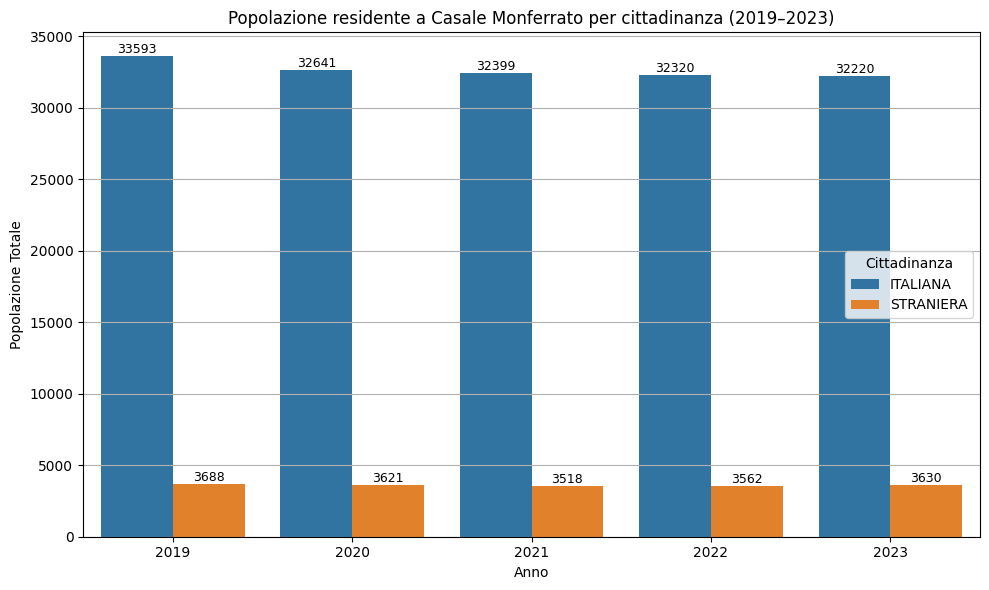

In [80]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_casale_anni, x='anno', y='popolazione_totale', hue='cittadinanza')

# Aggiungo etichette sopra ogni barra
for bars in barplot.containers:
    for bar in bars:
        height = bar.get_height()
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Aggiungi titoli e griglia
plt.title("Popolazione residente a Casale Monferrato per cittadinanza (2019–2023)")
plt.xlabel("Anno")
plt.ylabel("Popolazione Totale")
plt.legend(title="Cittadinanza")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [81]:
round((32220 - 33593) / 33593 * 100,2)

-4.09

Da questo grafico si osserva una stabilità della popolazione straniera a Casale Monferrato negli ultimi anni. La popolazione italiana ha mostrato una leggera flessione, passando da 33593 abitanti a 32220 nel 2023 con un calo di 1373 unità <b>-4.09%</b>.

### Calcoliamo l'indice di dipendenza degli anziani (IDA) per Casale Monferrato tra gli anni 2019 e 2023

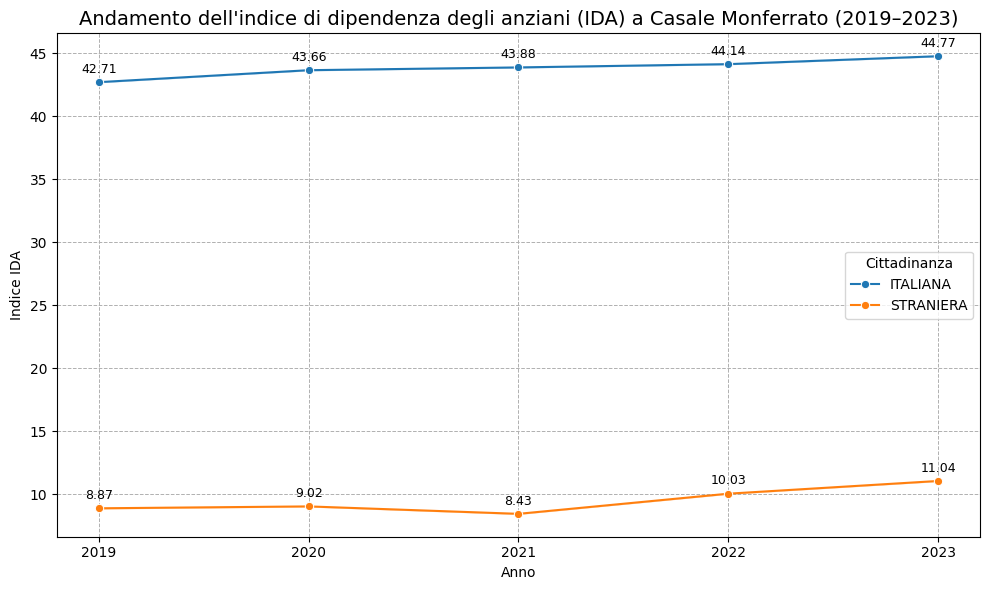

In [82]:
# Creazione del lineplot per l'indice di dipendenza degli anziani (IDA) a Casale Monferrato
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df_casale_anni,
    x='anno',
    y='indice_anziani',
    hue='cittadinanza',
    marker='o'
)

# Aggiunta delle etichette numeriche sui punti
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_val, y_val + 0.5, f'{y_val:.2f}', ha='center', va='bottom', fontsize=9)

# Personalizzazione asse X e layout
plt.title("Andamento dell'indice di dipendenza degli anziani (IDA) a Casale Monferrato (2019–2023)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Indice IDA")
plt.xticks(ticks=sorted(df_torino_anni['anno'].unique()))
plt.grid(True,linestyle='--', linewidth=0.7)
plt.legend(title="Cittadinanza")
plt.tight_layout()

# Mostra il grafico
plt.show()

Il grafico mostra L’IDA (Indice di Dipendenza degli Anziani) per il comune di Casale Monferrato. 

L’IDA degli Italiani è costantemente molto alto (oltre il 40%), in linea con l’invecchiamento tipico dei centri medio-piccoli.

L’IDA degli Stranieri è molto basso (tra 8% e 11%), ma mostra piccole variazioni anno su anno.Questo è coerente con la realtà demografica: la popolazione straniera è generalmente più giovane.

### 📌 Nota sulla fonte dei dati

I dati utilizzati in questa analisi provengono dal portale open data ufficiale della **Regione Piemonte**  
([dati.piemonte.it](https://www.dati.piemonte.it), fonte: **Yucca SDP**).

Per il Comune di **Casale Monferrato**, il dataset riporta una popolazione residente pari a **35.850 abitanti** nel **2023**.

🔍 Questo valore può differire leggermente da quelli pubblicati da altre fonti ufficiali, come:

- **ISTAT**: ~32.220 abitanti (stima al 31/12/2023)
- **Comune di Casale Monferrato**: ~32.789 abitanti

La differenza è attribuibile a metodologie di raccolta e aggiornamento differenti (es. inclusione di residenti temporanei, aggiornamenti più frequenti a livello locale, soglie minime per la tutela della privacy, ecc.).

> ⚠️ È quindi importante considerare questi dati nel contesto della fonte di riferimento e **non confrontarli direttamente** con altre fonti senza tener conto delle differenze metodologiche.



# Confronti

Confronto IDA tra Torino e Casale Monferrato (2019–2023)

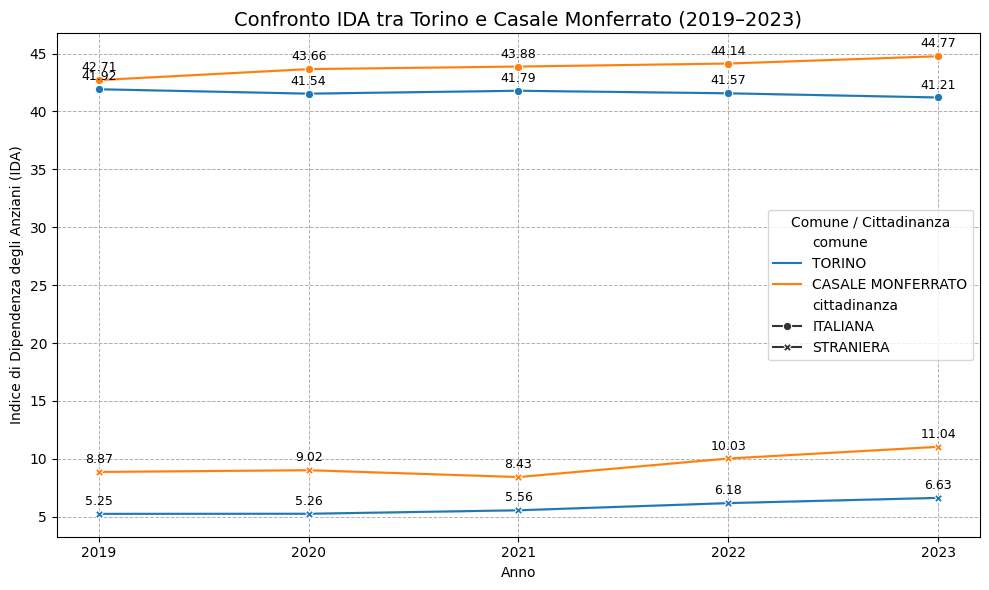

In [83]:
# Unisci i due dataset
df_confronto = pd.concat([df_torino_anni, df_casale_anni], ignore_index=True)

# Crea il grafico
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df_confronto,
    x='anno',
    y='indice_anziani',
    hue='comune',
    style='cittadinanza',
    markers=True,
    dashes=False
)

# Aggiungi etichette numeriche sopra i punti
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y_val):
            plt.text(
                x_val,
                y_val + 0.5,
                f'{y_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Etichette e griglia
plt.title("Confronto IDA tra Torino e Casale Monferrato (2019–2023)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Indice di Dipendenza degli Anziani (IDA)")
plt.xticks(sorted(df_confronto['anno'].unique()))
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Comune / Cittadinanza")
plt.tight_layout()
plt.show()


Da questo grafico si osserva che l'ida di Casale Monferrato è più alto sia per gli italiani che per gli stranieri, dimostrando una popolazione più anziana rispetto a Torino.

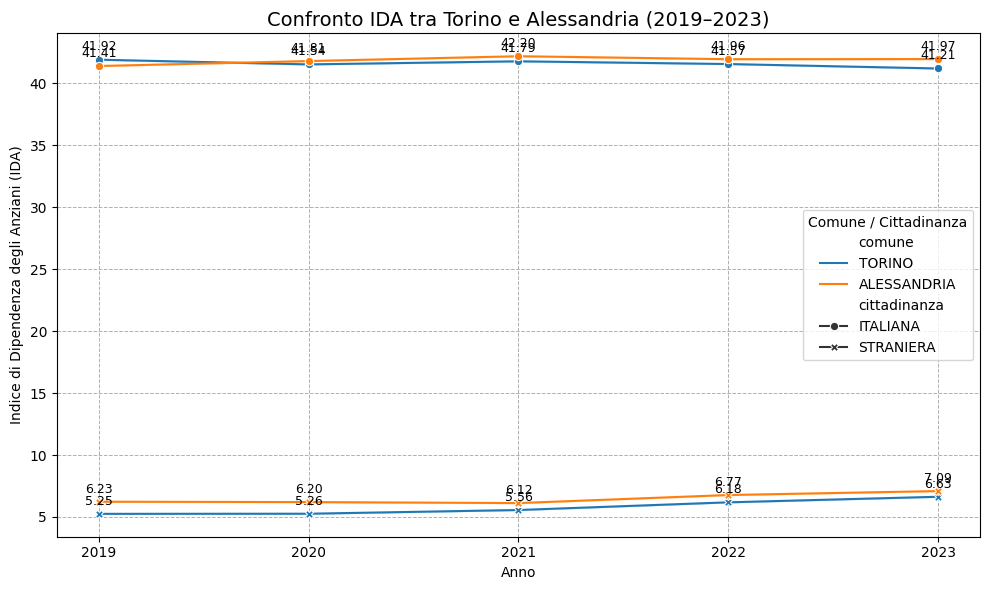

In [84]:
# Unisci i due dataset
df_confronto = pd.concat([df_torino_anni, df_alessandria_anni], ignore_index=True)

# Crea il grafico
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df_confronto,
    x='anno',
    y='indice_anziani',
    hue='comune',
    style='cittadinanza',
    markers=True,
    dashes=False
)

# Aggiungi etichette numeriche sopra i punti
for line in lineplot.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y_val):
            plt.text(
                x_val,
                y_val + 0.5,
                f'{y_val:.2f}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Etichette e griglia
plt.title("Confronto IDA tra Torino e Alessandria (2019–2023)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Indice di Dipendenza degli Anziani (IDA)")
plt.xticks(sorted(df_confronto['anno'].unique()))
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Comune / Cittadinanza")
plt.tight_layout()
plt.show()


Dal grafico si osservano differenze minime tra i due comuni per quanto riguarda l'andamento dell'IDA, suggerendo che nei centri più piccoli come Casale Monferrato la differenza è più marcata, con un IDA pù alto.

In [85]:
df.columns

Index(['anno', 'codice_istat', 'comune', 'cod_nuts', 'provincia',
       'cittadinanza', 'maschi_0_14', 'femmine_0_14', 'maschi_15_64',
       'femmine_15_64', 'maschi_over_65', 'femmine_over_65',
       'popolazione_totale', 'indice_anziani', 'eta_mediana'],
      dtype='object')

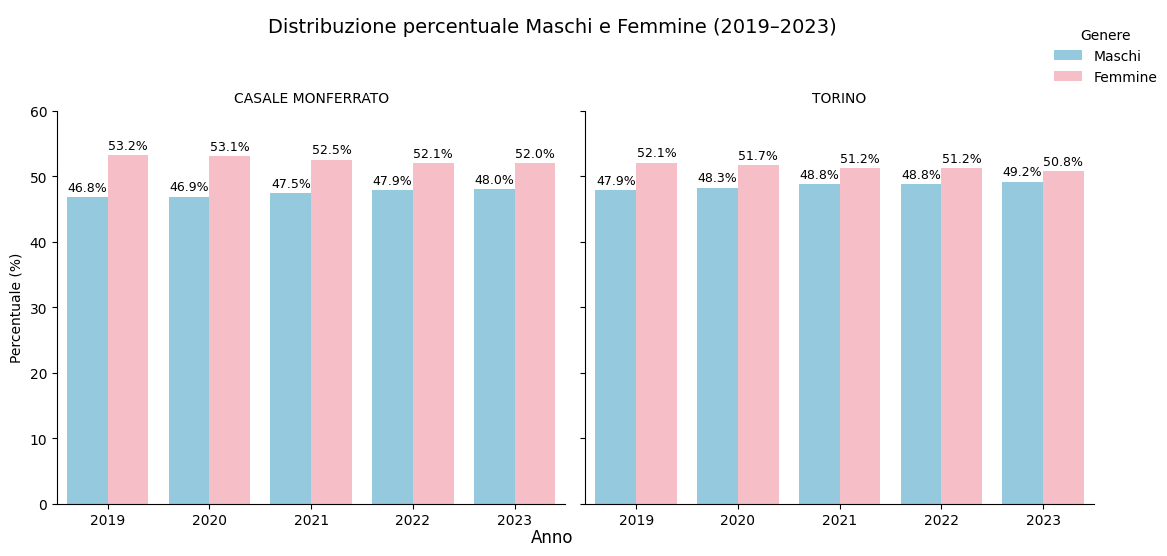

In [86]:
# Confronto tra Torino e Casale Monferrato per numero di maschi e femmine tra il 2019 e il 2023

# Concatena i dati di Torino e Casale Monferrato
df_genere = pd.concat([df_torino_anni, df_casale_anni], ignore_index=True)

# Calcolo totali
df_genere['maschi'] = df_genere[['maschi_0_14', 'maschi_15_64', 'maschi_over_65']].sum(axis=1)
df_genere['femmine'] = df_genere[['femmine_0_14', 'femmine_15_64', 'femmine_over_65']].sum(axis=1)
df_genere['totale'] = df_genere['maschi'] + df_genere['femmine']

# 🔴 Filtra righe con dati non validi
df_genere = df_genere[
    (df_genere['totale'] > 0) &
    (df_genere['maschi'] > 0) &
    (df_genere['femmine'] > 0)
]

# Calcolo percentuali
df_genere['perc_maschi'] = (df_genere['maschi'] / df_genere['totale']) * 100
df_genere['perc_femmine'] = (df_genere['femmine'] / df_genere['totale']) * 100

# Raggruppa e trasforma i dati
df_pct = df_genere.groupby(['comune', 'anno'])[['perc_maschi', 'perc_femmine']].mean().reset_index()
df_pct_long = df_pct.melt(
    id_vars=['comune', 'anno'],
    value_vars=['perc_maschi', 'perc_femmine'],
    var_name='genere',
    value_name='percentuale'
)
df_pct_long['genere'] = df_pct_long['genere'].replace({
    'perc_maschi': 'Maschi',
    'perc_femmine': 'Femmine'
})

# Grafico


g = sns.catplot(
    data=df_pct_long,
    x='anno',
    y='percentuale',
    hue='genere',
    col='comune',
    kind='bar',
    height=5,
    aspect=1,
    dodge=True,
    palette={'Maschi': 'skyblue', 'Femmine': 'lightpink'}  # ✅ colori personalizzati
)

# Etichette numeriche
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Personalizzazione
g.fig.suptitle("Distribuzione percentuale Maschi e Femmine (2019–2023)", fontsize=14, y=1.05)
g.set_axis_labels("", "Percentuale (%)")  # Rimuove etichetta "Anno" dai singoli plot
g.fig.text(0.5, 0.001, "Anno", ha='center', fontsize=12)  # più spazio  # Etichetta unica centrata
g.set_titles("{col_name}")
g.set(ylim=(0, 60))
g._legend.set_bbox_to_anchor((1.05, 1))
g._legend.set_title("Genere")
plt.tight_layout()
plt.show()


Da questo grafico si osserva che la distribuzione della popolazione per genere a Torino e Casale Monferrato è simile, con una leggera predominanza di donne in entrambe le città.

In [87]:
import numpy as np

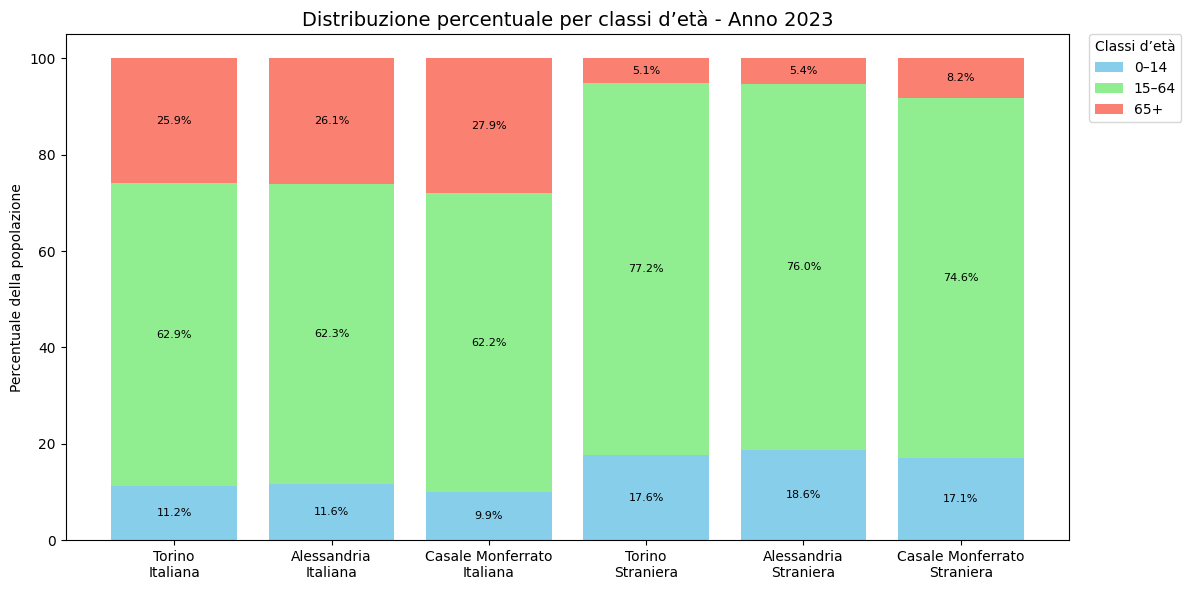

In [88]:
# Unisci i dati
df_2023 = pd.concat([df_torino_2023_clean, df_alessandria_2023_clean, df_casale_2023_clean], ignore_index=True)

# Calcola totali e percentuali
df_2023['totale'] = (
    df_2023[['maschi_0_14', 'femmine_0_14',
             'maschi_15_64', 'femmine_15_64',
             'maschi_over_65', 'femmine_over_65']].sum(axis=1)
)

df_2023['pop_0_14'] = df_2023['maschi_0_14'] + df_2023['femmine_0_14']
df_2023['pop_15_64'] = df_2023['maschi_15_64'] + df_2023['femmine_15_64']
df_2023['pop_65_plus'] = df_2023['maschi_over_65'] + df_2023['femmine_over_65']

df_2023['perc_pop_0_14'] = (df_2023['pop_0_14'] / df_2023['totale']) * 100
df_2023['perc_pop_15_64'] = (df_2023['pop_15_64'] / df_2023['totale']) * 100
df_2023['perc_pop_65_plus'] = (df_2023['pop_65_plus'] / df_2023['totale']) * 100

# Ordina i comuni nell'ordine desiderato
df_2023['comune'] = df_2023['comune'].str.title()
comuni_ordinati = ['Torino', 'Alessandria', 'Casale Monferrato']
df_2023['comune'] = pd.Categorical(df_2023['comune'], categories=comuni_ordinati, ordered=True)

# Capitalizza cittadinanza e ordina prima per cittadinanza, poi comune
df_2023['cittadinanza'] = df_2023['cittadinanza'].str.capitalize()
df_2023 = df_2023.sort_values(by=['cittadinanza', 'comune'])

# Etichette x: comune per cittadinanza
etichette = df_2023['comune'].astype(str) + '\n' + df_2023['cittadinanza']

# Dati per fasce d’età
bar_0_14 = df_2023['perc_pop_0_14'].values
bar_15_64 = df_2023['perc_pop_15_64'].values
bar_65_plus = df_2023['perc_pop_65_plus'].values

# Posizione delle barre
x = np.arange(len(df_2023))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x, bar_0_14, color='skyblue', label='0–14')
bar2 = ax.bar(x, bar_15_64, bottom=bar_0_14, color='lightgreen', label='15–64')
bar3 = ax.bar(x, bar_65_plus, bottom=bar_0_14 + bar_15_64, color='salmon', label='65+')

# Etichette percentuali dentro le barre
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=8
            )

# Layout e legenda
ax.set_xticks(x)
ax.set_xticklabels(etichette, rotation=0)
ax.set_ylabel('Percentuale della popolazione')
ax.set_title('Distribuzione percentuale per classi d’età - Anno 2023', fontsize=14)

# 🔄 Sposta la legenda fuori dal grafico, in alto a destra
ax.legend(
    title='Classi d’età',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

dal grafico si osserva che non ci sono differenze significative nella distribuzione della popolazione per fasce d'età tra Torino, Alessandria e Casale Monferrato.
A Casale Monferrato gli stranieri e gli italiani sono più anziani rispetto a Torino e Alessandria, ma la differenza non è così marcata.

Il trend generale mostra una popolazione straniera più giovane rispetto agli italiani in tutte e tre le città, con una maggiore concentrazione di stranieri nella fascia d'età 0–14 anni.

# 📊 Conclusioni Generali
Questa analisi ha evidenziato alcune dinamiche chiave della popolazione in Piemonte nel 2023:

La popolazione straniera è più giovane rispetto a quella italiana, con una forte concentrazione nella fascia 15–64 anni.

Le donne risultano predominanti soprattutto nella fascia 65+, riflettendo una maggiore longevità femminile.

L’IDA rimane elevato nella popolazione italiana, con valori simili tra Torino e Alessandria, mentre cresce lentamente anche tra gli stranieri.

La popolazione complessiva stimata nei dataset utilizzati presenta piccole discrepanze rispetto ai dati ISTAT ufficiali, ma offre comunque un quadro molto utile per l’analisi locale.

🔍 Il Piemonte si conferma una regione con una struttura demografica matura, ma con segnali di rinnovamento provenienti dalle nuove componenti migratorie.